In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf

In [2]:
model = pickle.load(open('model.pkl', 'rb'))

In [3]:
def prediction(file, img_height=224, img_width=224):
  ## Load an image
  image_inf = tf.keras.utils.load_img(file, target_size=(img_height, img_width))

  ## Rescaling and reshaping image
  x = tf.keras.utils.img_to_array(image_inf)/255
  x = np.expand_dims(x, axis=0)
  image_infs = np.vstack([x])

  ## Predict
  y_pred_inf_proba = model.predict(image_infs, batch_size=10)
  y_pred_inf_cls = np.argmax(y_pred_inf_proba)
  class_names = ['Dark', 'Green', 'Light', 'Medium']
  y_pred_class_name = class_names[np.argmax(y_pred_inf_proba[0])]

  return image_inf, y_pred_class_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Predicted class : Dark


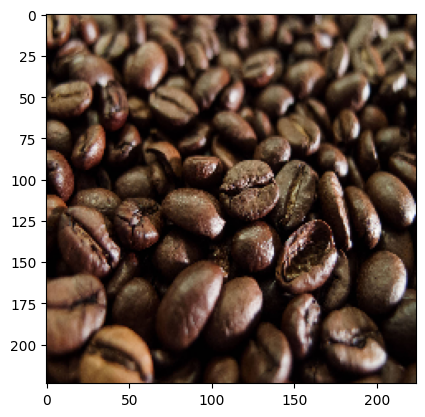

In [4]:
image_inf, predicted_class = prediction('inf_img.jpg')

plt.imshow(image_inf)
print(f'Predicted class : {predicted_class}')